In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/AbandonoEmpleados.csv', sep = ";", index_col = 'id', na_values = "#N/D")

In [ ]:
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,empleados,satisfaccion_entorno,sexo,...,satisfaccion_companeros,horas_quincena,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,conciliacion,anos_compania,anos_en_puesto,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,Universitaria,Life Sciences,1,Media,3.0,...,Baja,80,0,8,0,NaN,6,NaN,0,5
2,49,No,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,1,Alta,2.0,...,Muy_Alta,80,1,10,3,NaN,10,NaN,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,Secundaria,Other,1,Muy_Alta,2.0,...,Media,80,0,7,3,NaN,0,2.0,0,0
5,33,No,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,1,Muy_Alta,3.0,...,Alta,80,0,8,3,NaN,8,3.0,3,0
7,27,No,Travel_Rarely,Research & Development,2,Universitaria,Medical,1,Baja,3.0,...,Muy_Alta,80,1,6,3,NaN,2,NaN,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,Research & Development,23,Master,Medical,1,Alta,4.0,...,Alta,80,1,17,3,NaN,5,4.0,0,3
2062,39,No,Travel_Rarely,Research & Development,6,Secundaria,Medical,1,Muy_Alta,2.0,...,Baja,80,1,9,5,NaN,7,NaN,1,7
2064,27,No,Travel_Rarely,Research & Development,4,Master,Life Sciences,1,Media,4.0,...,Media,80,1,6,0,NaN,6,NaN,0,3


In [ ]:
df.isna().sum().sort_values(ascending=False)

anos_en_puesto              1238
conciliacion                1011
sexo                         199
educacion                    101
satisfaccion_trabajo          76
implicacion                   18
edad                           0
nivel_acciones                 0
evaluacion                     0
satisfaccion_companeros        0
horas_quincena                 0
anos_experiencia               0
horas_extra                    0
num_formaciones_ult_ano        0
anos_compania                  0
anos_desde_ult_promocion       0
incremento_salario_porc        0
salario_mes                    0
mayor_edad                     0
num_empresas_anteriores        0
abandono                       0
estado_civil                   0
puesto                         0
nivel_laboral                  0
satisfaccion_entorno           0
empleados                      0
carrera                        0
distancia_casa                 0
departamento                   0
viajes                         0
anos_con_m

In [ ]:
df.drop(columns = ['anos_en_puesto','conciliacion'], inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   object 
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1369 non-null   object 
 6   carrera                   1470 non-null   object 
 7   empleados                 1470 non-null   int64  
 8   satisfaccion_entorno      1470 non-null   object 
 9   sexo                      1271 non-null   float64
 10  implicacion               1452 non-null   object 
 11  nivel_laboral             1470 non-null   int64  
 12  puesto                    1470 non-null   object 
 13  satisfaccion_trabajo      1394 non-null   object 
 14  estado_c

In [ ]:
#EDA Variables Categóricas
def graficos_eda_categorias(cat):
  #Calcular el numero de filas que necesitamos
  from math import ceil
  filas = ceil(cat.shape[1]/2)

  #Definimos el gráfico
  f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16,filas * 16))

  #Apilamos el gráfico
  ax = ax.flat

  #Creamos el bucle
  for cada, variable in enumerate(cat):
      cat[variable].value_counts().plot.barh(ax = ax[cada])
      ax[cada].set_title(variable, fontsize = 12, fontweight = 'bold')
      ax[cada].tick_params(labelsize = 12)

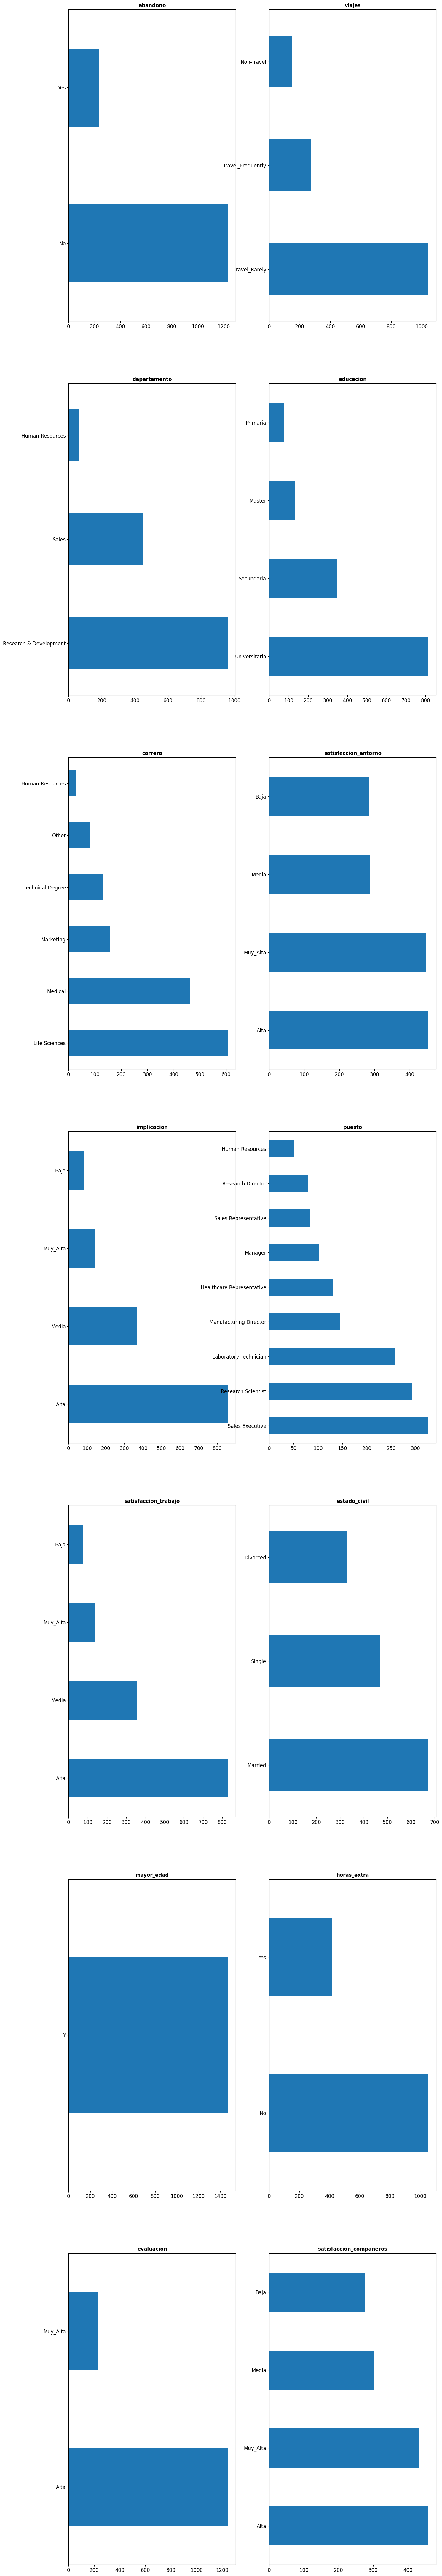

In [ ]:
graficos_eda_categorias(df.select_dtypes('O'))

In [ ]:
df.drop(columns = 'mayor_edad', inplace = True)

In [ ]:
df['educacion'] = df['educacion'].fillna('Universitaria')

In [ ]:
df['satisfaccion_trabajo'] = df['satisfaccion_trabajo'].fillna('Alta')

In [ ]:
df['implicacion'] = df['implicacion'].fillna('Alta')

In [ ]:
def estadisticos_cont(num):
    estadisticos = num.describe().T
    estadisticos['median'] = num.median()
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    return(estadisticos)

In [ ]:
estadisticos_cont(df.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
edad,1470.0,36.923810,36.0,9.135373,18.0,30.0,36.0,43.0,60.0
distancia_casa,1470.0,9.192517,7.0,8.106864,1.0,2.0,7.0,14.0,29.0
empleados,1470.0,1.000000,1.0,0.000000,1.0,1.0,1.0,1.0,1.0
sexo,1271.0,2.727773,3.0,0.720788,1.0,2.0,3.0,3.0,4.0
nivel_laboral,1470.0,2.063946,2.0,1.106940,1.0,1.0,2.0,3.0,5.0
salario_mes,1470.0,6502.931293,4919.0,4707.956783,1009.0,2911.0,4919.0,8379.0,19999.0
num_empresas_anteriores,1470.0,2.693197,2.0,2.498009,0.0,1.0,2.0,4.0,9.0
incremento_salario_porc,1470.0,15.209524,14.0,3.659938,11.0,12.0,14.0,18.0,25.0
horas_quincena,1470.0,80.000000,80.0,0.000000,80.0,80.0,80.0,80.0,80.0
nivel_acciones,1470.0,0.793878,1.0,0.852077,0.0,0.0,1.0,1.0,3.0


In [ ]:
df.drop(columns = ['empleados','sexo','horas_quincena'],inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   edad                      1470 non-null   int64 
 1   abandono                  1470 non-null   object
 2   viajes                    1470 non-null   object
 3   departamento              1470 non-null   object
 4   distancia_casa            1470 non-null   int64 
 5   educacion                 1470 non-null   object
 6   carrera                   1470 non-null   object
 7   satisfaccion_entorno      1470 non-null   object
 8   implicacion               1470 non-null   object
 9   nivel_laboral             1470 non-null   int64 
 10  puesto                    1470 non-null   object
 11  satisfaccion_trabajo      1470 non-null   object
 12  estado_civil              1470 non-null   object
 13  salario_mes               1470 non-null   int64 
 14  num_empresas_anteriores 

In [ ]:
df.abandono.value_counts(normalize = True) * 100

No     83.877551
Yes    16.122449
Name: abandono, dtype: float64

In [ ]:
df['abandono'] = df.abandono.map({'No':0, 'Yes':1})

In [ ]:
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,horas_extra,incremento_salario_porc,evaluacion,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Yes,11,Alta,Baja,0,8,0,6,0,5
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,No,23,Muy_Alta,Muy_Alta,1,10,3,10,1,7
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Yes,15,Alta,Media,0,7,3,0,0,0
5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Yes,11,Alta,Alta,0,8,3,8,3,0
7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,No,12,Alta,Muy_Alta,1,6,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,...,No,17,Alta,Alta,1,17,3,5,0,3
2062,39,0,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,...,No,15,Alta,Baja,1,9,5,7,1,7
2064,27,0,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,...,Yes,20,Muy_Alta,Media,1,6,0,6,0,3


<Axes: xlabel='educacion'>

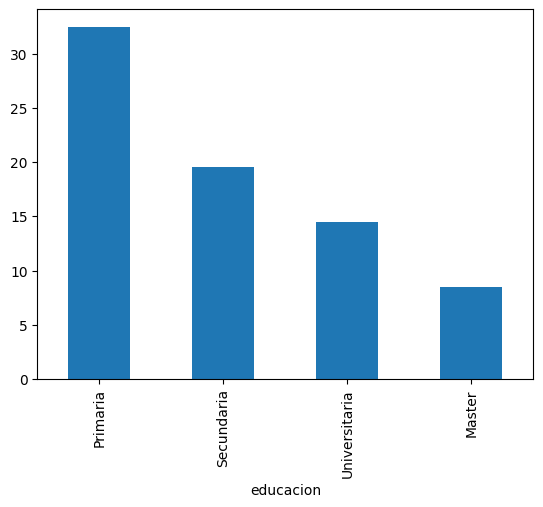

In [ ]:
temp = df.groupby('educacion').abandono.mean().sort_values(ascending = False) * 100
temp.plot.bar()

<Axes: xlabel='estado_civil'>

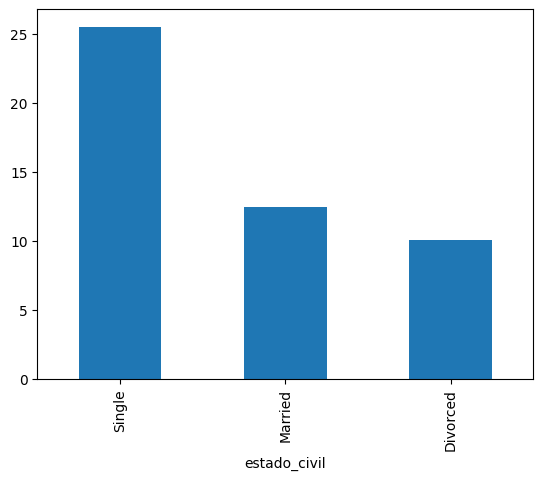

In [ ]:
temp = df.groupby('estado_civil').abandono.mean().sort_values(ascending = False) * 100
temp.plot.bar()

<Axes: xlabel='horas_extra'>

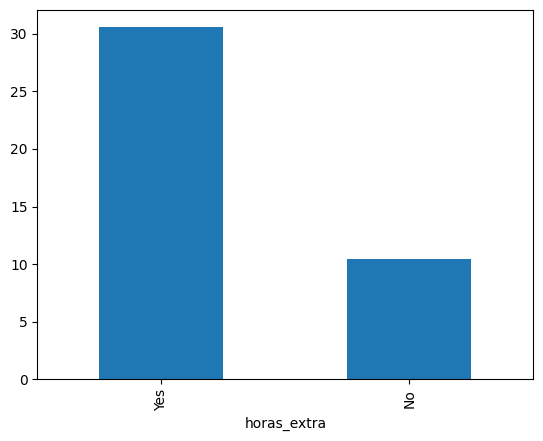

In [ ]:
temp = df.groupby('horas_extra').abandono.mean().sort_values(ascending = False) * 100
temp.plot.bar()

<Axes: xlabel='puesto'>

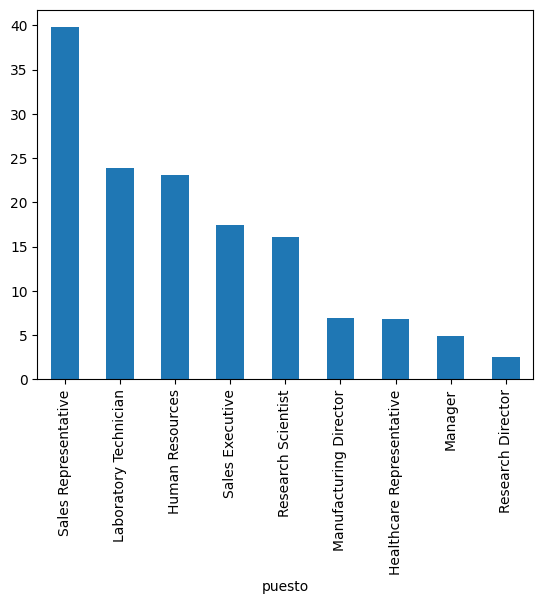

In [ ]:
temp = df.groupby('puesto').abandono.mean().sort_values(ascending = False)*100
temp.plot.bar()

<Axes: xlabel='abandono'>

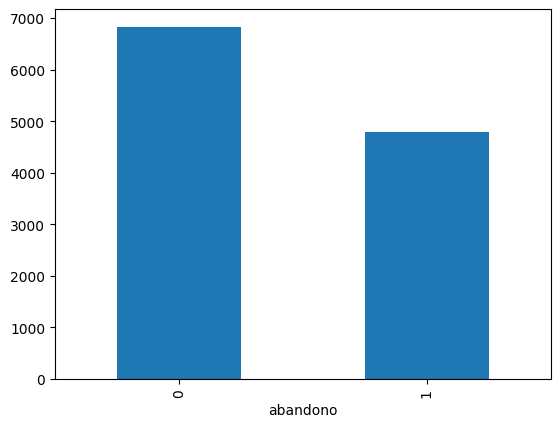

In [ ]:
temp = df.groupby('abandono').salario_mes.mean()
temp.plot.bar()

In [ ]:
df['salario_ano'] = df.salario_mes.transform(lambda x: x*12)
df[['salario_mes','salario_ano']]

,salario_mes,salario_ano
id,,
1,5993,71916
2,5130,61560
4,2090,25080
5,2909,34908
7,3468,41616
...,...,...
2061,2571,30852
2062,9991,119892
2064,6142,73704


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   edad                      1470 non-null   int64 
 1   abandono                  1470 non-null   int64 
 2   viajes                    1470 non-null   object
 3   departamento              1470 non-null   object
 4   distancia_casa            1470 non-null   int64 
 5   educacion                 1470 non-null   object
 6   carrera                   1470 non-null   object
 7   satisfaccion_entorno      1470 non-null   object
 8   implicacion               1470 non-null   object
 9   nivel_laboral             1470 non-null   int64 
 10  puesto                    1470 non-null   object
 11  satisfaccion_trabajo      1470 non-null   object
 12  estado_civil              1470 non-null   object
 13  salario_mes               1470 non-null   int64 
 14  num_empresas_anteriores 

In [ ]:
condiciones = [(df['salario_ano'] < 30000),
               (df['salario_ano'] >= 30000) & (df['salario_ano'] < 50000),
               (df['salario_ano'] >= 50000) & (df['salario_ano'] < 75000),
               (df['salario_ano'] >= 75000)]

resultados = [df.salario_ano * 0.161, df.salario_ano * 0.197, df.salario_ano * 0.204, df.salario_ano * 0.21]
df['impacto_abandono'] = np.select(condiciones, resultados, default = 000)
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,evaluacion,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Alta,Baja,0,8,0,6,0,5,71916,14670.864
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,Muy_Alta,Muy_Alta,1,10,3,10,1,7,61560,12558.240
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Alta,Media,0,7,3,0,0,0,25080,4037.880
5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Alta,Alta,0,8,3,8,3,0,34908,6876.876
7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,Alta,Muy_Alta,1,6,3,2,2,2,41616,8198.352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,...,Alta,Alta,1,17,3,5,0,3,30852,6077.844
2062,39,0,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,...,Alta,Baja,1,9,5,7,1,7,119892,25177.320
2064,27,0,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,...,Muy_Alta,Media,1,6,0,6,0,3,73704,15035.616


In [ ]:
costo_total = df.loc[df.abandono == 1].impacto_abandono.sum()
print(fr'El impacto que ha tenido la empresa en el ultimo ano es: {costo_total} USD')

El impacto que ha tenido la empresa en el ultimo ano es: 2719005.912 USD


In [ ]:
df.loc[(df.abandono == 1) & (df.implicacion == 'Baja')].impacto_abandono.sum()

368672.688

In [ ]:
print(f'Reducir un 10% de la fuga de empleados nos ahorraria a la empresa {int(costo_total) * 0.1}$ cada ano')
print(f'Reducir un 20% de la fuga de empleados nos ahorraria a la empresa {int(costo_total) * 0.2}$ cada ano')
print(f'Reducir un 30% de la fuga de empleados nos ahorraria a la empresa {int(costo_total) * 0.3}$ cada ano')

Reducir un 10% de la fuga de empleados nos ahorraria a la empresa 271900.5$ cada ano
Reducir un 20% de la fuga de empleados nos ahorraria a la empresa 543801.0$ cada ano
Reducir un 30% de la fuga de empleados nos ahorraria a la empresa 815701.5$ cada ano


In [ ]:
total_repre_pasado = len(df.loc[df.puesto == 'Sales Representative'])
abandonos_repre_pasado = len(df.loc[(df.puesto == 'Sales Representative') & (df.abandono == 1)])
porc_pasado = abandonos_repre_pasado/total_repre_pasado
print(fr'El porcentaje de abandono es: {porc_pasado*100}')


El porcentaje de abandono es: 39.75903614457831


In [ ]:
total_repre_actual = len(df.loc[(df.puesto == 'Sales Representative') & (df.abandono == 0)])
se_iran = int(total_repre_actual * porc_pasado)

print(fr'se iran este ano de la compania: {se_iran}')

se iran este ano de la compania: 19


In [ ]:
retenemos = int(se_iran * 0.3)
ahorramos = df.loc[(df.puesto == 'Sales Representative') & (df.abandono == 0), 'impacto_abandono'].sum() * porc_pasado * 0.3
print(f'Podemos retener {retenemos} representantes de ventas y ello supondría en dinero {int(ahorramos)}$')

Podemos retener 5 representantes de ventas y ello supondría en dinero 37447$


In [ ]:
df_ml = df.copy()

In [ ]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   int64  
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1470 non-null   object 
 6   carrera                   1470 non-null   object 
 7   satisfaccion_entorno      1470 non-null   object 
 8   implicacion               1470 non-null   object 
 9   nivel_laboral             1470 non-null   int64  
 10  puesto                    1470 non-null   object 
 11  satisfaccion_trabajo      1470 non-null   object 
 12  estado_civil              1470 non-null   object 
 13  salario_mes               1470 non-null   int64  
 14  num_empr

In [ ]:
from sklearn.preprocessing import OneHotEncoder
cat = df_ml.select_dtypes('O')
ohe = OneHotEncoder(sparse = False)
ohe.fit(cat)
cat_ohe = ohe.transform(cat)
cat_ohe = pd.DataFrame(cat_ohe, columns = ohe.get_feature_names_out(input_features=cat.columns)).reset_index(drop = True)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
cat_ohe

,viajes_Non-Travel,viajes_Travel_Frequently,viajes_Travel_Rarely,departamento_Human Resources,departamento_Research & Development,departamento_Sales,educacion_Master,educacion_Primaria,educacion_Secundaria,educacion_Universitaria,...,estado_civil_Married,estado_civil_Single,horas_extra_No,horas_extra_Yes,evaluacion_Alta,evaluacion_Muy_Alta,satisfaccion_companeros_Alta,satisfaccion_companeros_Baja,satisfaccion_companeros_Media,satisfaccion_companeros_Muy_Alta
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
num = df.select_dtypes('number').reset_index(drop = True)


In [ ]:
df_ml = pd.concat([cat_ohe, num], axis = 1)

In [ ]:
df_ml

,viajes_Non-Travel,viajes_Travel_Frequently,viajes_Travel_Rarely,departamento_Human Resources,departamento_Research & Development,departamento_Sales,educacion_Master,educacion_Primaria,educacion_Secundaria,educacion_Universitaria,...,num_empresas_anteriores,incremento_salario_porc,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,8,11,0,8,0,6,0,5,71916,14670.864
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1,23,1,10,3,10,1,7,61560,12558.240
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,6,15,0,7,3,0,0,0,25080,4037.880
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1,11,0,8,3,8,3,0,34908,6876.876
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,9,12,1,6,3,2,2,2,41616,8198.352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,4,17,1,17,3,5,0,3,30852,6077.844
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,4,15,1,9,5,7,1,7,119892,25177.320
1467,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1,20,1,6,0,6,0,3,73704,15035.616
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,2,14,0,17,3,9,0,8,64680,13194.720


In [ ]:
x = df_ml.drop(columns = 'abandono')
y = df_ml['abandono']

In [ ]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.3)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
ac = DecisionTreeClassifier(max_depth=4)
ac.fit(train_x,train_y)

DecisionTreeClassifier(max_depth=4)

In [ ]:
pred = ac.predict_proba(test_x)[:,1]
pred[:20]

array([0.41176471, 0.11764706, 0.03902439, 0.03902439, 0.17010309,
       0.11764706, 0.07692308, 0.17010309, 0.11764706, 0.11764706,
       0.11764706, 0.11764706, 0.41176471, 0.11764706, 0.11764706,
       0.03902439, 0.03902439, 0.17010309, 0.11764706, 0.17010309])

In [ ]:
from sklearn.metrics import roc_auc_score
eva = roc_auc_score(test_y,pred)
print(f'El porcentaje de evaluacion de nuestro modelo es: {eva*100}')

El porcentaje de evaluacion de nuestro modelo es: 68.43870415298987


[Text(0.45535714285714285, 0.9, 'node #0\nanos_experiencia <= 1.5\nsamples = 100.0%\nvalue = [0.84, 0.16]'),
 Text(0.19642857142857142, 0.7, 'node #1\nhoras_extra_No <= 0.5\nsamples = 5.5%\nvalue = [0.46, 0.54]'),
 Text(0.10714285714285714, 0.5, 'node #2\nsalario_mes <= 2929.5\nsamples = 1.9%\nvalue = [0.2, 0.8]'),
 Text(0.07142857142857142, 0.3, 'node #3\nedad <= 30.0\nsamples = 1.7%\nvalue = [0.11, 0.89]'),
 Text(0.03571428571428571, 0.1, 'node #4\nsamples = 1.4%\nvalue = [0.0, 1.0]'),
 Text(0.10714285714285714, 0.1, 'node #5\nsamples = 0.4%\nvalue = [0.5, 0.5]'),
 Text(0.14285714285714285, 0.3, 'node #6\nsamples = 0.2%\nvalue = [1.0, 0.0]'),
 Text(0.2857142857142857, 0.5, 'node #7\nsatisfaccion_companeros_Baja <= 0.5\nsamples = 3.6%\nvalue = [0.59, 0.41]'),
 Text(0.21428571428571427, 0.3, 'node #8\ndistancia_casa <= 6.5\nsamples = 2.9%\nvalue = [0.7, 0.3]'),
 Text(0.17857142857142858, 0.1, 'node #9\nsamples = 1.3%\nvalue = [0.92, 0.08]'),
 Text(0.25, 0.1, 'node #10\nsamples = 1.7%\n

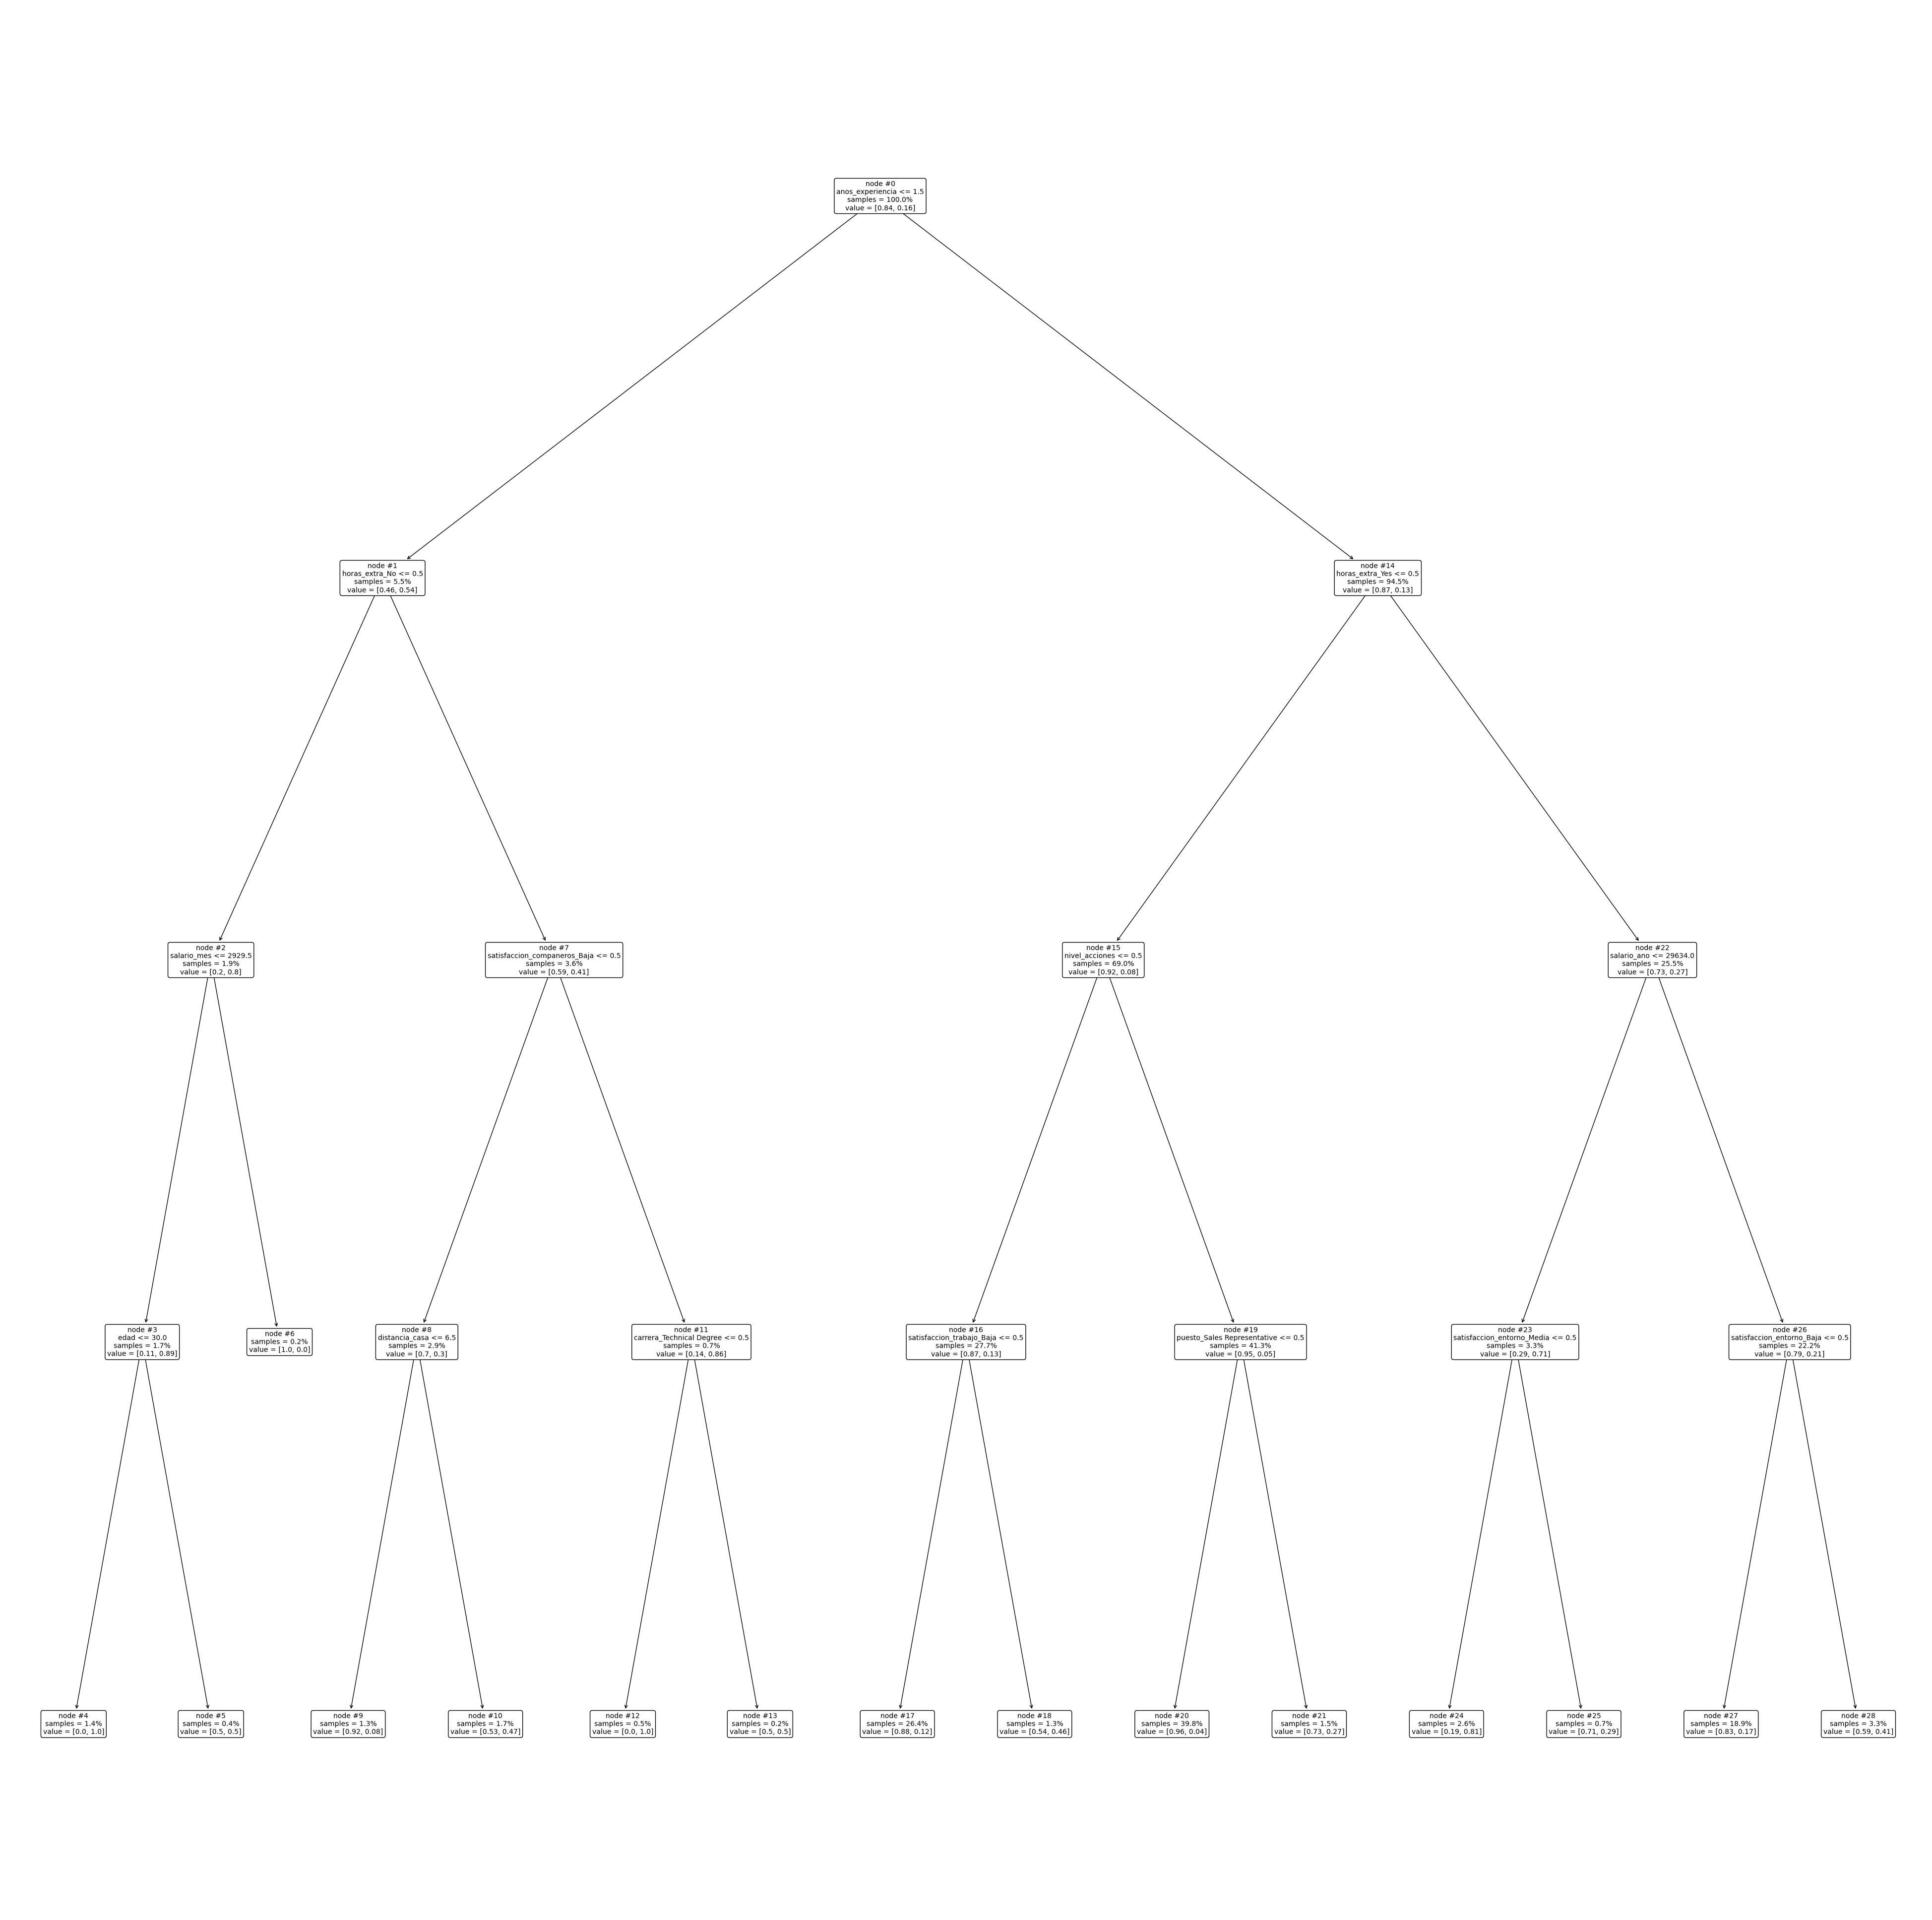

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(50,50))

plot_tree(ac,
          feature_names=test_x.columns,
           impurity=False,
            node_ids=True,
             proportion=True,
              rounded=True,
               precision=2)

<Axes: >

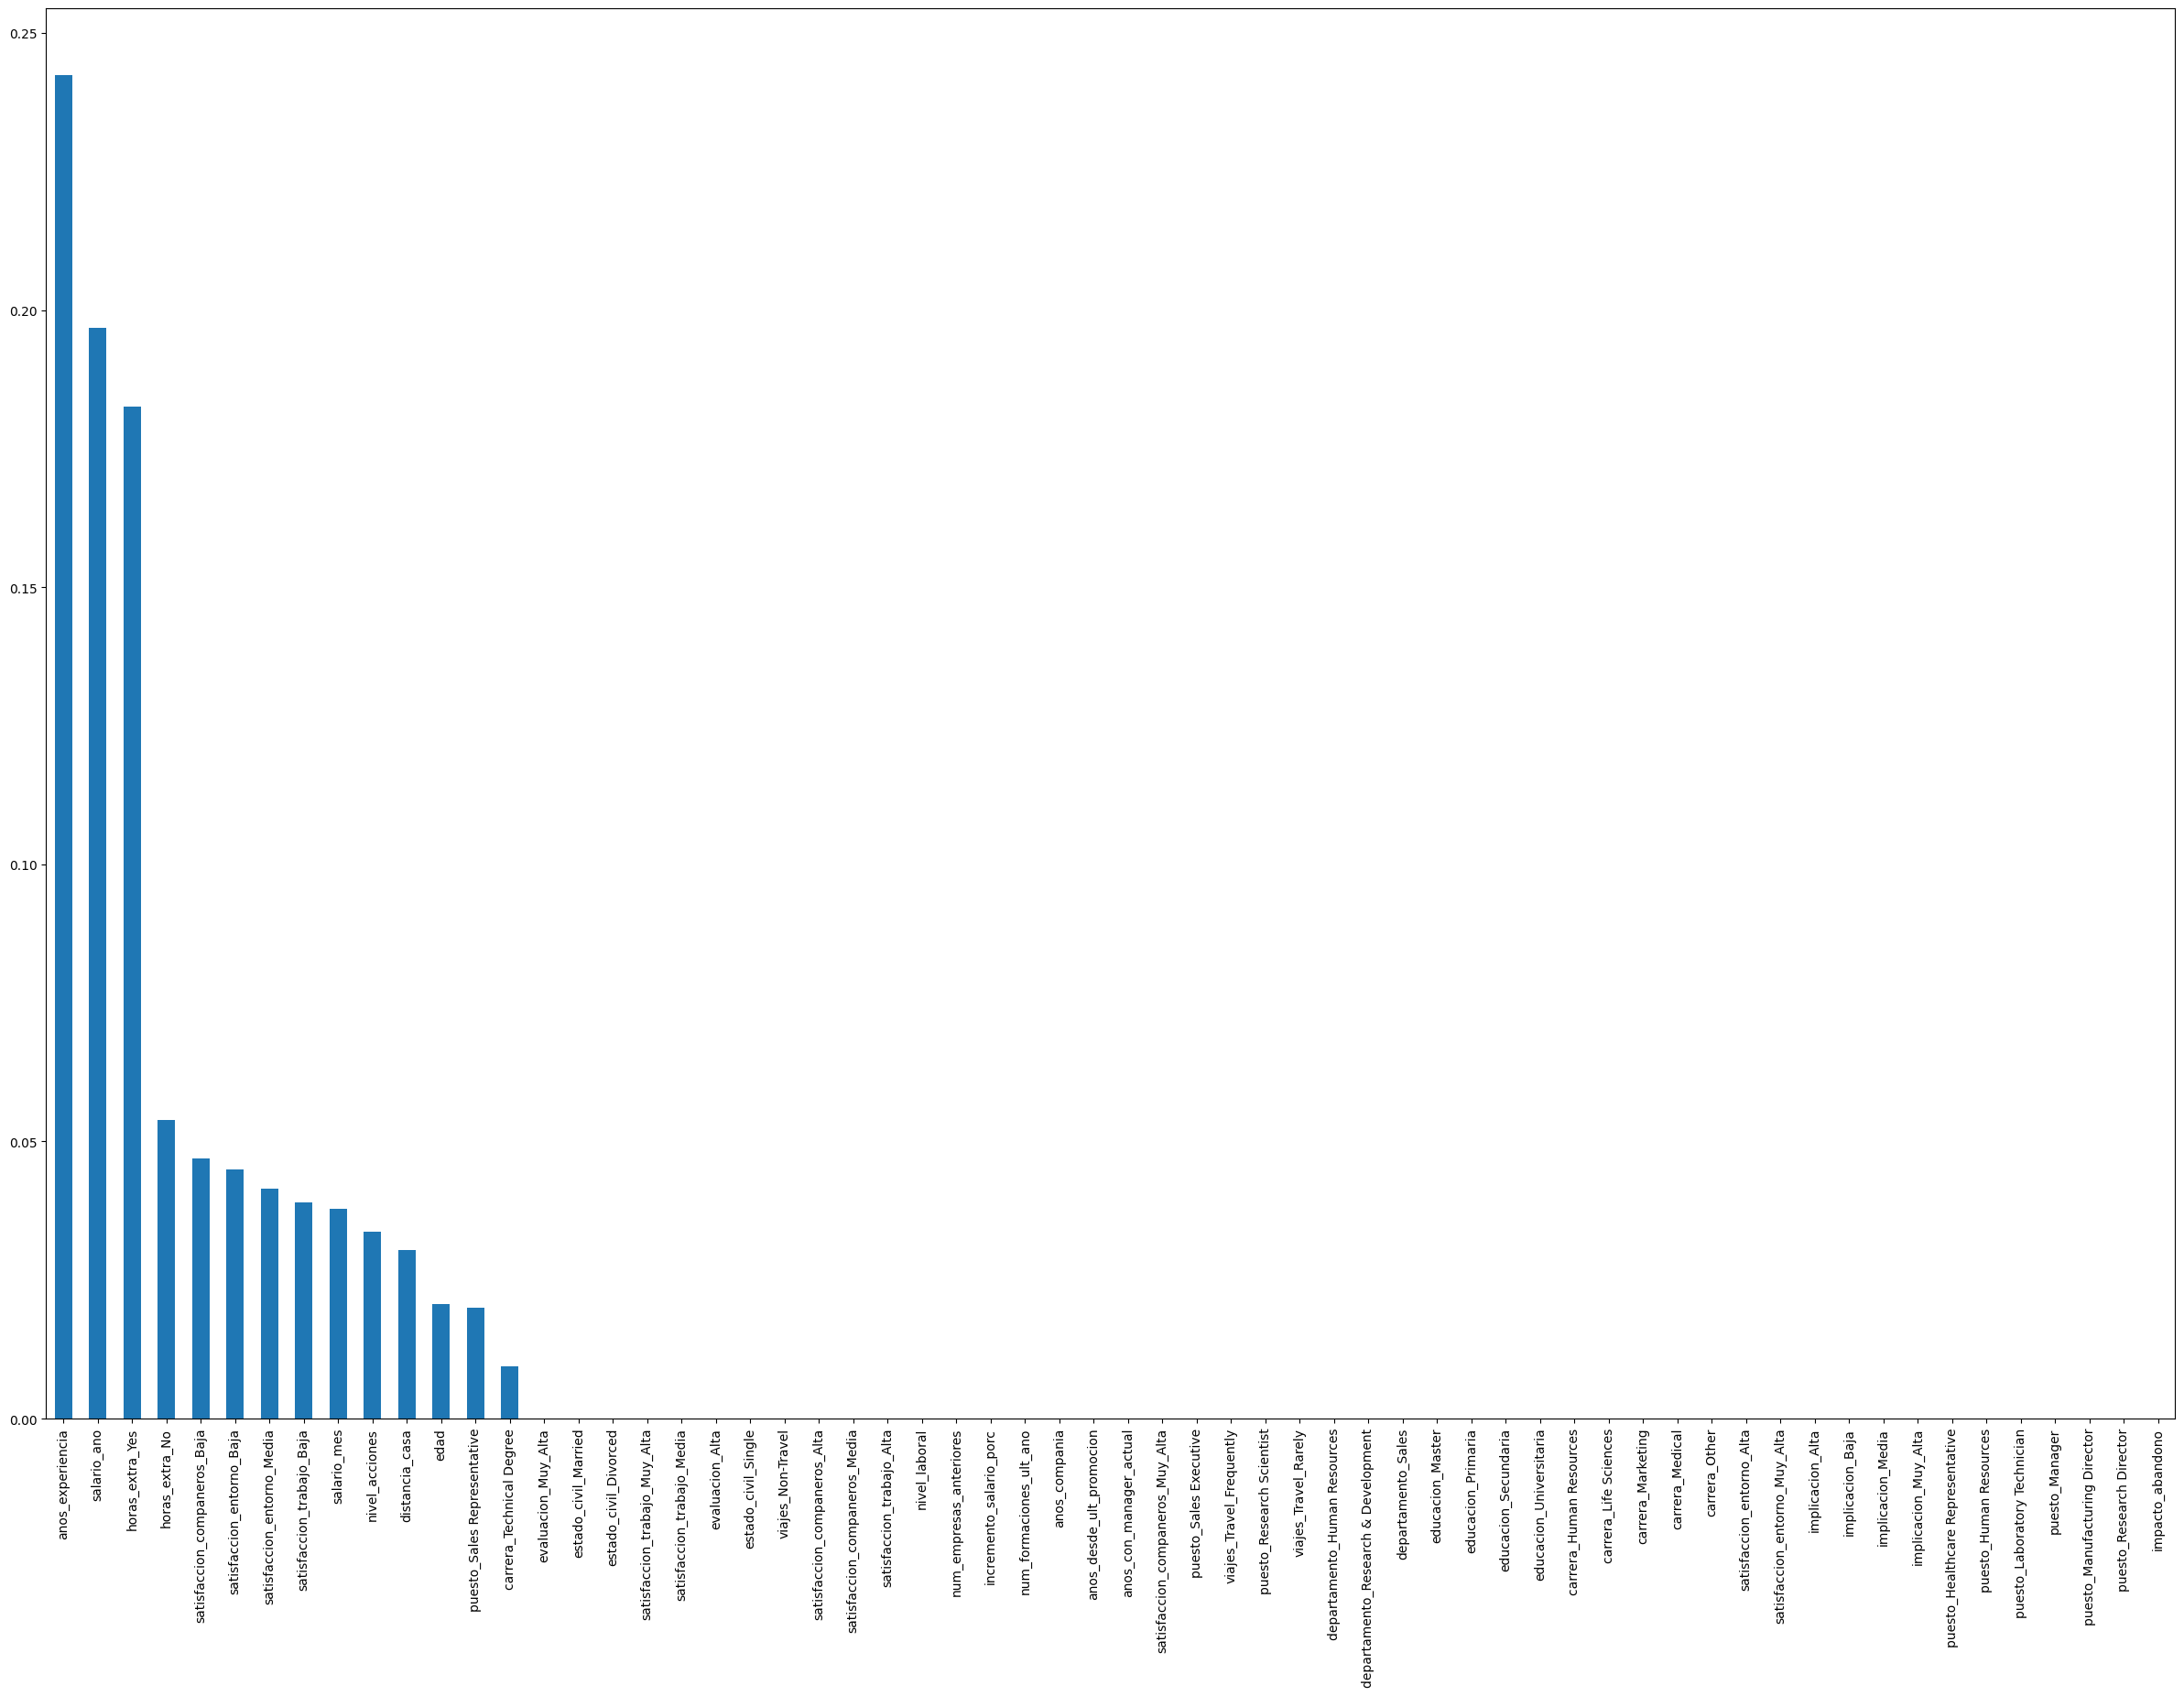

In [ ]:
pd.Series(ac.feature_importances_, index = test_x.columns).sort_values(ascending = False).plot(kind='bar', figsize = (30,20))

In [ ]:
df['scoring_abandono'] = ac.predict_proba(df_ml.drop(columns = 'abandono'))[:,1]

In [ ]:
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono,scoring_abandono
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Baja,0,8,0,6,0,5,71916,14670.864,0.170103
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,Muy_Alta,1,10,3,10,1,7,61560,12558.240,0.039024
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Media,0,7,3,0,0,0,25080,4037.880,0.814815
5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Alta,0,8,3,8,3,0,34908,6876.876,0.170103
7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,Muy_Alta,1,6,3,2,2,2,41616,8198.352,0.039024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,...,Alta,1,17,3,5,0,3,30852,6077.844,0.039024
2062,39,0,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,...,Baja,1,9,5,7,1,7,119892,25177.320,0.039024
2064,27,0,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,...,Media,1,6,0,6,0,3,73704,15035.616,0.170103


In [ ]:
df.sort_values(by = 'scoring_abandono', ascending = False)[0:10]

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono,scoring_abandono
id,,,,,,,,,,,,,,,,,,,,,
959,19,1,Travel_Rarely,Sales,21,Secundaria,Other,Muy_Alta,Media,1,...,Media,0,1,3,1,0,0,25452,4097.772,1.0
1783,22,1,Travel_Rarely,Research & Development,8,Universitaria,Medical,Alta,Alta,1,...,Alta,0,1,6,1,0,0,28776,4632.936,1.0
1944,27,1,Travel_Frequently,Human Resources,22,Secundaria,Human Resources,Baja,Media,1,...,Baja,0,1,2,1,0,0,34356,6768.132,1.0
1079,21,1,Travel_Rarely,Research & Development,10,Secundaria,Life Sciences,Alta,Media,1,...,Baja,0,1,6,1,1,0,16992,2735.712,1.0
137,20,1,Travel_Frequently,Research & Development,6,Secundaria,Life Sciences,Muy_Alta,Media,1,...,Media,0,1,5,1,1,0,35112,6917.064,1.0
816,29,1,Travel_Rarely,Research & Development,1,Secundaria,Life Sciences,Media,Media,1,...,Muy_Alta,1,1,1,1,0,0,27828,4480.308,1.0
811,23,1,Travel_Rarely,Research & Development,6,Master,Life Sciences,Alta,Muy_Alta,1,...,Alta,2,1,2,0,0,0,19212,3093.132,1.0
1111,28,1,Travel_Frequently,Research & Development,1,Secundaria,Medical,Baja,Media,1,...,Baja,2,1,2,1,0,0,31152,6136.944,1.0
167,19,1,Travel_Rarely,Sales,22,Universitaria,Marketing,Muy_Alta,Alta,1,...,Muy_Alta,0,0,2,0,0,0,20100,3236.100,1.0


In [ ]:
df.to_excel('abandono_con_scoring1.xlsx')